In [227]:
from pprint import pprint
import requests

# TOKEN_API_OPENWEATHER = '16566c3a3219a0c615ec12412a4acaae'
# city_ID = 'LONDON'
# country_code = 'UK'
# data = requests.get(f'http://history.openweathermap.org/data/2.5/history/city?q={city_ID},{country_code}&type=hour&appid={TOKEN_API_OPENWEATHER}').json()
# это перестало работать :(
# не дает взять данные за временной промежуток - хочет денег
# но доставать данные по api я научился


import os
os.environ['KAGGLE_USERNAME'] = "nkoluzanov"
os.environ['KAGGLE_KEY'] = "3985ee1aec78f857e9cf60d34c1af2c3"
!kaggle datasets download -d camnugent/sandp500
# unzip
import zipfile
path_to_extract = 'data/sandp500/'
with zipfile.ZipFile('sandp500.zip', 'r') as zip_ref:
    zip_ref.extractall(path_to_extract)

sandp500.zip: Skipping, found more recently modified local copy (use --force to force download)


In [228]:
import pandas as pd
import numpy as np

In [229]:
import os
data = pd.read_csv(os.path.join('data/sandp500','all_stocks_5yr.csv'))

*Оно ломалось, тк pandas записывал в Data Frame лишние данные, чтобы дозаполнить до размера остальных.*
*Именно поэтому 1259 - количество дней \* на кол-во компаний*

In [230]:
#n - num_of_companies
n = 10
data = data.head(1259*n)

*standartize time date*

In [231]:
data[(data['Name'] == 'AAL') & (data['date'] == '2013-02-08')].values.tolist()[0][1:6]

[15.07, 15.12, 14.63, 14.75, 8407500]

In [232]:
names = data['Name'].unique()
dates = data['date'].unique()

arr = []
for date in dates:
    d = {}
    d['date'] = date
    for name in names:
        d[name] = data[(data['Name'] == name) & (data['date'] == date)].values.tolist()
        if len(d[name])>0:
            # get open value
            d[name] = d[name][0][1]

    arr.append(d)

In [233]:
standartize_stocks = pd.DataFrame(data=arr)
standartize_stocks.head(5)

,date,AAL,AAPL,AAP,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM
0,2013-02-08,15.07,67.7142,78.34,36.37,46.52,34.39,73.01,38.31,44.72,30.31
1,2013-02-11,14.89,68.0714,78.65,36.13,46.85,34.42,73.09,38.99,45.99,30.26
2,2013-02-12,14.45,68.5014,78.39,35.77,46.70,34.27,72.89,38.55,46.15,30.22
3,2013-02-13,14.30,66.7442,78.90,35.42,46.74,34.29,73.32,38.90,46.29,30.91
4,2013-02-14,14.94,66.3599,78.66,35.05,46.67,34.28,73.21,38.70,46.02,31.03


In [234]:
standartize_stocks.index = pd.to_datetime(standartize_stocks['date'])
standartize_stocks = standartize_stocks.drop(columns='date')
standartize_stocks.head()

,AAL,AAPL,AAP,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM
date,,,,,,,,,,
2013-02-08,15.07,67.7142,78.34,36.37,46.52,34.39,73.01,38.31,44.72,30.31
2013-02-11,14.89,68.0714,78.65,36.13,46.85,34.42,73.09,38.99,45.99,30.26
2013-02-12,14.45,68.5014,78.39,35.77,46.70,34.27,72.89,38.55,46.15,30.22
2013-02-13,14.30,66.7442,78.90,35.42,46.74,34.29,73.32,38.90,46.29,30.91
2013-02-14,14.94,66.3599,78.66,35.05,46.67,34.28,73.21,38.70,46.02,31.03


In [235]:
standartize_stocks = standartize_stocks.sort_values(by='date')
standartize_stocks

,AAL,AAPL,AAP,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM
date,,,,,,,,,,
2013-02-08,15.07,67.7142,78.34,36.37,46.52,34.39,73.010,38.31,44.72,30.31
2013-02-11,14.89,68.0714,78.65,36.13,46.85,34.42,73.090,38.99,45.99,30.26
2013-02-12,14.45,68.5014,78.39,35.77,46.70,34.27,72.890,38.55,46.15,30.22
2013-02-13,14.30,66.7442,78.90,35.42,46.74,34.29,73.320,38.90,46.29,30.91
2013-02-14,14.94,66.3599,78.66,35.05,46.67,34.28,73.210,38.70,46.02,31.03
...,...,...,...,...,...,...,...,...,...,...
2018-02-01,54.00,167.1650,116.24,112.24,97.74,61.75,160.155,199.12,91.25,42.77
2018-02-02,53.49,166.0000,115.92,115.50,99.09,62.20,159.980,197.33,90.74,42.04
2018-02-05,51.99,159.1000,113.05,113.00,95.62,61.60,156.120,194.06,88.75,42.24


In [236]:
standartize_stocks.index = standartize_stocks.index.to_period('D')
standartize_stocks.index

PeriodIndex(['2013-02-08', '2013-02-11', '2013-02-12', '2013-02-13',
             '2013-02-14', '2013-02-15', '2013-02-19', '2013-02-20',
             '2013-02-21', '2013-02-22',
             ...
             '2018-01-25', '2018-01-26', '2018-01-29', '2018-01-30',
             '2018-01-31', '2018-02-01', '2018-02-02', '2018-02-05',
             '2018-02-06', '2018-02-07'],
            dtype='period[D]', name='date', length=1259)

In [237]:
standartize_stocks.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1259 entries, 2013-02-08 to 2018-02-07
Freq: D
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAL     1259 non-null   float64
 1   AAPL    1259 non-null   float64
 2   AAP     1259 non-null   float64
 3   ABBV    1259 non-null   float64
 4   ABC     1259 non-null   float64
 5   ABT     1259 non-null   float64
 6   ACN     1259 non-null   float64
 7   ADBE    1259 non-null   float64
 8   ADI     1259 non-null   float64
 9   ADM     1259 non-null   float64
dtypes: float64(10)
memory usage: 108.2 KB


In [258]:
standartize_stocks.to_csv(f'data/sandp500/sp500_{n}.csv')
# not working, set only data column
#standartize_stocks = standartize_stocks.resample('W', convention='end').mean()

*Creating plots*

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='AAL'>)

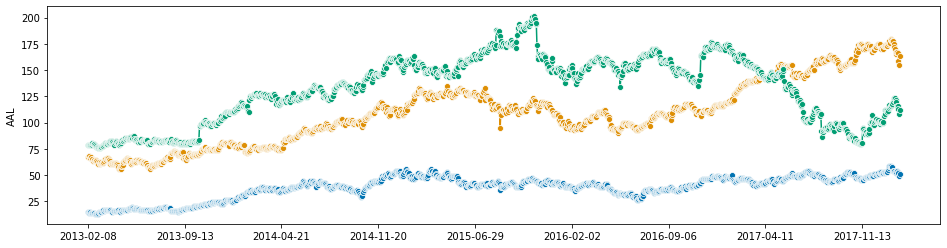

In [246]:
from sktime.utils.plotting import plot_series
plot_series(standartize_stocks['AAL'], standartize_stocks['AAPL'], standartize_stocks['AAP'])

In [240]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

# когда 10000 записей падает на str - str -> в записях где-то NaN или подобное
# Нашел -> AAP     1259 non-null   object , остальные - float
# Оно ломалось, тк pandas записывал в Data Frame лишние данные, чтобы дозаполнить до размера остальных.
def cointegration_test(df, alpha = 0.05):
    out = coint_johansen(df, -1,2)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length=6): return str(val).ljust(length)
    print('Name :: TEST STAT > C(95%)   => Signif \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':', adjust(round(trace,2), 9), ">", adjust(cvt,8), " => ", trace>cvt)

In [241]:
cointegration_test(standartize_stocks)

Name :: TEST STAT > C(95%)   => Signif 
 ----------------------------------------
AAL    : 211.85    > 219.4051  =>  False
AAPL   : 158.19    > 179.5199  =>  False
AAP    : 117.08    > 143.6691  =>  False
ABBV   : 84.49     > 111.7797  =>  False
ABC    : 57.45     > 83.9383   =>  False
ABT    : 35.97     > 60.0627   =>  False
ACN    : 20.64     > 40.1749   =>  False
ADBE   : 10.59     > 24.2761   =>  False
ADI    : 4.3       > 12.3212   =>  False
ADM    : 0.04      > 4.1296    =>  False


In [250]:
from statsmodels.tsa.api import VAR
model = VAR(standartize_stocks)

In [253]:
for i in range(1,10):
    result = model.fit(i)
    print('LAG : ', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC : ', result.hqic, '\n\n')


LAG :  1
AIC :  -0.19512813842508395
BIC :  0.2540774482987971
FPE :  0.822732895173266
HQIC :  -0.026310223372819908 


LAG :  2
AIC :  -0.1599207263281705
BIC :  0.6982029600711549
FPE :  0.852237840654841
HQIC :  0.16258718538325456 


LAG :  3
AIC :  -0.11334038718136541
BIC :  1.1542257573876828
FPE :  0.8929362276542444
HQIC :  0.36306671482607145 


LAG :  4
AIC :  -0.05539486485768974
BIC :  1.6221391982036748
FPE :  0.9463315779472717
HQIC :  0.5751210726936957 


LAG :  5
AIC :  0.013087395999386242
BIC :  2.1011159428960067
FPE :  1.0136283351878728
HQIC :  0.7979222672830857 


LAG :  6
AIC :  0.07542177309531917
BIC :  2.574472477394283
FPE :  1.0791698401015317
HQIC :  1.0147861305744208 


LAG :  7
AIC :  0.14582719975329028
BIC :  3.056428846461462
FPE :  1.1584065250139703
HQIC :  1.239932051504876 


LAG :  8
AIC :  0.21448783588487852
BIC :  3.5371703246764037
FPE :  1.2414772984205553
HQIC :  1.4635446469442914 


LAG :  9
AIC :  0.2512668778182663
BIC :  3.98656122

In [255]:
x = model.select_order(maxlags=2)
x.summary()

,AIC,BIC,FPE,HQIC
0,37.59,37.63,2.117e+16,37.61
1,-0.1892*,0.2603*,0.8276*,-0.02024*
2,-0.1599,0.6982,0.8522,0.1626


In [256]:
model_fitted = model.fit(4)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 15, May, 2022
Time:                     12:25:42
--------------------------------------------------------------------
No. of Equations:         10.0000    BIC:                    1.62214
Nobs:                     1255.00    HQIC:                  0.575121
Log likelihood:          -17362.9    FPE:                   0.946332
AIC:                   -0.0553949    Det(Omega_mle):        0.686168
--------------------------------------------------------------------
Results for equation AAL
             coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------
const           1.514344         0.528862            2.863           0.004
L1.AAL          1.013068         0.031568           32.091           0.000
L1.AAPL        -0.060543         0.017879           -3.386           0.001
L1.AAP     

In [16]:
# TODO INSERT GOOGLE TRENDS INTO STAT
#GOOGLE TRENDS ABOUT ALCOHOLISM
import pandas as pd
data_alco = pd.read_csv('data/geoMap.csv')

In [17]:
# было бы здорово раскрасить карту
data_alco = data_alco.head(10)[1:10]

In [23]:
from sktime.utils.plotting import plot_series
print()

NotImplementedError: <class 'pandas.core.indexes.base.Index'> is not supported for input, use one of (<class 'pandas.core.indexes.range.RangeIndex'>, <class 'pandas.core.indexes.period.PeriodIndex'>, <class 'pandas.core.indexes.datetimes.DatetimeIndex'>, <class 'pandas.core.indexes.timedeltas.TimedeltaIndex'>) instead.